# CREDIT SCORECARD MODELING

Scorecard Modeling is a statistical technique utilised in estimating the probability or likelihood of a borrower defaulting on a loan or credit obligation. It assigns a credit score to a borrower, which reflects their creditworthiness.

 Credit risk modeling is cruicial in making data driven decisions for financial institutions this inludes reasons such as;
manage overall risk exposure, and meet regulatory requirements, compliance 

Credit risk is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations. This consequently means that a lender may not receive the owed principal and interest, which results in an interruption of cash flows and increased costs for collection. Although it's impossible to know exactly who will default on obligations, properly assessing and managing credit risk can lessen the severity of a loss. 
In this project, I am building a predictive model based on historical data.

Why logistic regression?

Regression analysis is utilised in predicting the probability of a particular outcome based on a set of input variables.  The outcome of interest is whether or not a borrower will default on a loan. 
Credit score cards are based on historical data.  
Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.

Data source
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

Questions:

- How does the probability of defaulting payment vary by categories of different demographic variables?
- Which variables are the strongest predictors of default payment?
- What's the content of data?
- What is the state of the data quality?
- How are the numerical attributes distributed?
- How are the categorical attributes distributed?
- What's the influence of Risk and Credit Amount in other features?
- Is there any other pattern that may be related to credit risk?

Dataset from kaggle: Default of Credit Card Client

https://www.kaggle.com/code/thiagopanini/predicting-credit-risk-eda-viz-pipeline/notebook

Predicting Credit defaulters using Deep Learning (Used same dataset)

https://jovian.ml/mukundan-sankar14/default-credit-card/v/139?utm_source=embed

EDA and Logistic Regression

https://www.kaggle.com/code/fegadeharish/eda-and-logistic-regression/notebook


How to Predict If Someone Would Default on Their Credit Payment Using Deep Learning

https://medium.com/swlh/how-to-predict-if-someone-would-default-on-their-credit-payment-using-deep-learning-49ee032a8a31

Credit Risk modeling: Importance, model types, and 10 best practices

https://www.aporia.com/learn/machine-learning-for-business/credit-risk-modeling-importance-model-types-and-10-best-practices/


_

# Import necessary libraries

In [1]:

import pandas as pd  # To work with dataset
import numpy as np  # Math library
import seaborn as sns # Graph library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt # Plotting parameters
import matplotlib.patches as mpatches



- What is the content of the data?

In [41]:
# Importing the data

df = pd.read_csv("./UCI_Credit_Card.csv",index_col=0)
print(df)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1        20000.0    2          2         1   24      2      2     -1     -1   
2       120000.0    2          2         2   26     -1      2      0      0   
3        90000.0    2          2         2   34      0      0      0      0   
4        50000.0    2          2         1   37      0      0      0      0   
5        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996   220000.0    1          3         1   39      0      0      0      0   
29997   150000.0    1          3         2   43     -1     -1     -1     -1   
29998    30000.0    1          2         2   37      4      3      2     -1   
29999    80000.0    1          3         1   41      1     -1      0      0   
30000    50000.0    1          2         1   46     

In [3]:
# Generate descriptive statistics 

df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
df_shape = pd.read_csv('./UCI_Credit_Card.csv', delimiter=',')
nRow, nCol = df_shape.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


In [5]:
df.isna().sum() 

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

KEY

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [6]:
# Summary of df's structure and content

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [ ]:
input_cols=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
categorical_cols=['SEX', 'EDUCATION', 'MARRIAGE',  'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

cont_cols=['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','AGE',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
output_cols='default.payment.next.month'

#  response/target variable Iam trying to predict

Insight into the data 

In [16]:
# COLUMN: DEFAULT PAYMENT NEXT MONTH

print(df['default.payment.next.month'])

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default.payment.next.month, Length: 30000, dtype: int64


In [17]:
# COLUMN: AGE

print(df['AGE'])

ID
1        24
2        26
3        34
4        37
5        57
         ..
29996    39
29997    43
29998    37
29999    41
30000    46
Name: AGE, Length: 30000, dtype: int64


In [18]:
# COLUMN: EDUCATION

print(df['EDUCATION'])

ID
1        2
2        2
3        2
4        2
5        2
        ..
29996    3
29997    3
29998    2
29999    3
30000    2
Name: EDUCATION, Length: 30000, dtype: int64


In [19]:
# COLUMN: MARRIAGE
 
print(df['MARRIAGE'])

ID
1        1
2        2
3        2
4        1
5        1
        ..
29996    1
29997    2
29998    2
29999    1
30000    1
Name: MARRIAGE, Length: 30000, dtype: int64


# Exploratory Data Analysis 

SWEETVIZ REPORT

In [7]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Display the Sweetviz report

import sweetviz as sv
sweetviz_report = sv.analyze(df)
sweetviz_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


AUTOVIZ REPORT

- Autoviz report for picking out data quality issues and displaying outliers, lower and upper limits of the data.

In [8]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Display the autoviz report

from autoviz.AutoViz_Class import AutoViz_Class

# autoviz_report = AV.AutoViz('./UCI_Credit_Card.csv')

# depVar='' Specifies that there is no dependent variable (target variable) specified for the analysis.

# verbose=2 Sets the verbosity level to 2, which provides detailed information about the analysis,
# including the types of plots being generated.

# max_rows_analyzed=100000 Specifies the maximum number of rows to analyze. 
# this value is adjustable basing on the dataset size.

AV = AutoViz_Class()
autoviz_report = AV.AutoViz('./UCI_Credit_Card.csv', 
                             depVar='', 
                             verbose=2, 
                             max_rows_analyzed=100000, 
                             )


Shape of your Data Set loaded: (30000, 25)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns (max) in each category:
    Numeric Columns : ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    Integer-Categorical Columns: ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['SEX', 'default.payment.next.month']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['ID']
    Columns that will not

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,int64,0.000000,100,1.000000,30000.000000,Possible ID column: drop before modeling step.
LIMIT_BAL,float64,0.000000,NA,10000.000000,1000000.000000,Column has 167 outliers greater than upper bound (525000.00) or lower than lower bound(-235000.00). Cap them or remove them.
SEX,int64,0.000000,0,1.000000,2.000000,No issue
EDUCATION,int64,0.000000,0,0.000000,6.000000,Column has 454 outliers greater than upper bound (3.50) or lower than lower bound(-0.50). Cap them or remove them.
MARRIAGE,int64,0.000000,0,0.000000,3.000000,No issue
AGE,int64,0.000000,0,21.000000,79.000000,Column has 272 outliers greater than upper bound (60.50) or lower than lower bound(8.50). Cap them or remove them.
PAY_0,int64,0.000000,0,-2.000000,8.000000,Column has 3130 outliers greater than upper bound (1.50) or lower than lower bound(-2.50). Cap them or remove them.
PAY_2,int64,0.000000,0,-2.000000,8.000000,Column has 4410 outliers greater than upper bound (1.50) or lower than lower bound(-2.50). Cap them or remove them.
PAY_3,int64,0.000000,0,-2.000000,8.000000,Column has 4209 outliers greater than upper bound (1.50) or lower than lower bound(-2.50). Cap them or remove them.
PAY_4,int64,0.000000,0,-2.000000,8.000000,Column has 3508 outliers greater than upper bound (1.50) or lower than lower bound(-2.50). Cap them or remove them.


Number of All Scatter Plots = 91
Could not draw Distribution Plots
All Plots are saved in .\AutoViz_Plots\AutoViz
Time to run AutoViz = 96 seconds 


- How are the categorical attributes distributed?

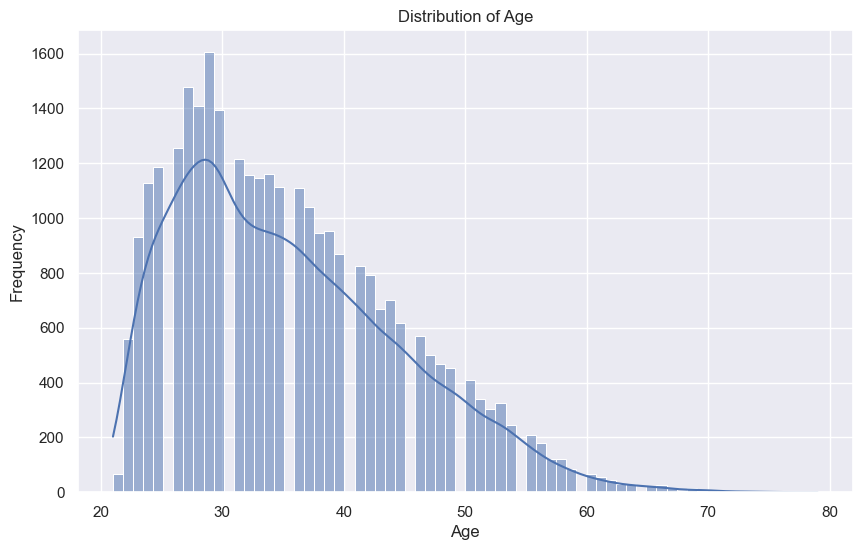

In [18]:

# Distribution of the 'AGE' column
# HISTOGRAM


sns.set(rc={"figure.figsize": (10, 6)})  

sns.histplot(df['AGE'], kde=True)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


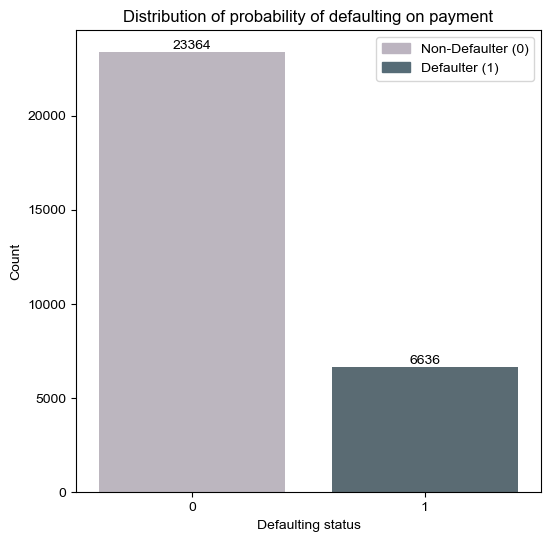

In [23]:

# Distribution of probability of defaulting on payment
# COUNTPLOT

# font setting
plt.rcParams['font.family'] = 'Arial'

the_ok = '#bcb4c0'
the_not = '#566c77'

# plotting the countplot
plt.figure(figsize=(6, 6)) 
plt.title("Distribution of probability of defaulting on payment")
ax = sns.countplot(x='default.payment.next.month', data=df, palette=[the_ok, the_not])

# counts for each category
counts = df['default.payment.next.month'].value_counts()

# text labels for each bar
for idx, value in enumerate(counts):
    plt.text(idx, value, str(value), ha='center', va='bottom')

# legend patches
ok_patch = mpatches.Patch(color=the_ok, label='Non-Defaulter (0)')
not_patch = mpatches.Patch(color=the_not, label='Defaulter (1)')

# legend
plt.legend(handles=[ok_patch, not_patch], loc='upper right')

# labels
plt.xlabel('Defaulting status')
plt.ylabel('Count')

# displaying the plot
plt.show()


In [ ]:
"""" nd and d are user defined variables; ie, nd representing non-defaulters, d representing defaulters. """

In [13]:
# Overview of binary variable (target)

nd = df['default.payment.next.month'].value_counts()[0]    # Number of non-defaulters (0)
d = df['default.payment.next.month'].value_counts()[1]     # Number of defaulters (1)
print('Total NO DEFAULT(0):', d, 'lines, representing', round((d / (nd + d)) * 100, 2), '% of the dataset')
print('Total DEFAULT(1):', nd, 'lines, representing', round((nd / (nd + d)) * 100, 2), '% of the dataset')


Total NO DEFAULT(0): 6636 lines, representing 22.12 % of the dataset
Total DEFAULT(1): 23364 lines, representing 77.88 % of the dataset


In [14]:
# Counting defaulters and non-defaulters basing on gender

nd_female = df[df['default.payment.next.month'] == 0]['SEX'].value_counts()[2]   # Number of non-defaulters (0) among females (2)
nd_male = df[df['default.payment.next.month'] == 0]['SEX'].value_counts()[1]     # Number of non-defaulters (0) among males (1)
d_female = df[df['default.payment.next.month'] == 1]['SEX'].value_counts()[2]    # Number of defaulters (1) among females (2)
d_male = df[df['default.payment.next.month'] == 1]['SEX'].value_counts()[1]      # Number of defaulters (1) among males (1)

print('Total Non-Default (Female):', nd_female, 'lines, representing', round((nd_female / (nd_female + d_female)) * 100, 2), '% of the dataset')
print('Total Non-Default (Male):', nd_male, 'lines, representing', round((nd_male / (nd_male + d_male)) * 100, 2), '% of the dataset')
print('Total Default (Female):', d_female, 'lines, representing', round((d_female / (nd_female + d_female)) * 100, 2), '% of the dataset')
print('Total Default (Male):', d_male, 'lines, representing', round((d_male / (nd_male + d_male)) * 100, 2), '% of the dataset')


Total Non-Default (Female): 14349 lines, representing 79.22 % of the dataset
Total Non-Default (Male): 9015 lines, representing 75.83 % of the dataset
Total Default (Female): 3763 lines, representing 20.78 % of the dataset
Total Default (Male): 2873 lines, representing 24.17 % of the dataset


In [15]:
# Counting defaulters and non-defaulters basing on marital status

nd_married = df[df['default.payment.next.month'] == 0]['MARRIAGE'].value_counts()[1]     # Number of non-defaulters (0) among married (1)
nd_single = df[df['default.payment.next.month'] == 0]['MARRIAGE'].value_counts()[2]      # Number of non-defaulters (0) among single (2)
nd_others = df[df['default.payment.next.month'] == 0]['MARRIAGE'].value_counts()[3]      # Number of non-defaulters (0) among others (3)
d_married = df[df['default.payment.next.month'] == 1]['MARRIAGE'].value_counts()[1]      # Number of defaulters (1) among married (1)
d_single = df[df['default.payment.next.month'] == 1]['MARRIAGE'].value_counts()[2]       # Number of defaulters (1) among single (2)
d_others = df[df['default.payment.next.month'] == 1]['MARRIAGE'].value_counts()[3]       # Number of defaulters (1) among others (3)

print('Total Non-Default (Married):', nd_married, 'lines, representing', round((nd_married / (nd_married + d_married)) * 100, 2), '% of the dataset')
print('Total Non-Default (Single):', nd_single, 'lines, representing', round((nd_single / (nd_single + d_single)) * 100, 2), '% of the dataset')
print('Total Non-Default (Others):', nd_others, 'lines, representing', round((nd_others / (nd_others + d_others)) * 100, 2), '% of the dataset')
print('Total Default (Married):', d_married, 'lines, representing', round((d_married / (nd_married + d_married)) * 100, 2), '% of the dataset')
print('Total Default (Single):', d_single, 'lines, representing', round((d_single / (nd_single + d_single)) * 100, 2), '% of the dataset')
print('Total Default (Others):', d_others, 'lines, representing', round((d_others / (nd_others + d_others)) * 100, 2), '% of the dataset')


Total Non-Default (Married): 10453 lines, representing 76.53 % of the dataset
Total Non-Default (Single): 12623 lines, representing 79.07 % of the dataset
Total Non-Default (Others): 239 lines, representing 73.99 % of the dataset
Total Default (Married): 3206 lines, representing 23.47 % of the dataset
Total Default (Single): 3341 lines, representing 20.93 % of the dataset
Total Default (Others): 84 lines, representing 26.01 % of the dataset


In [31]:
# Counting defaulters and non-defaulters based on education level
nd_graduate = df[df['default.payment.next.month'] == 0]['EDUCATION'].value_counts()[1]       # Number of non-defaulters (0) among graduate school (1)
nd_university = df[df['default.payment.next.month'] == 0]['EDUCATION'].value_counts()[2]     # Number of non-defaulters (0) among university (2)
nd_high_school = df[df['default.payment.next.month'] == 0]['EDUCATION'].value_counts()[3]    # Number of non-defaulters (0) among high school (3)
nd_others_edu = df[df['default.payment.next.month'] == 0]['EDUCATION'].value_counts()[4]     # Number of non-defaulters (0) among others (4)
d_graduate = df[df['default.payment.next.month'] == 1]['EDUCATION'].value_counts()[1]        # Number of defaulters (1) among graduate school (1)
d_university = df[df['default.payment.next.month'] == 1]['EDUCATION'].value_counts()[2]      # Number of defaulters (1) among university (2)
d_high_school = df[df['default.payment.next.month'] == 1]['EDUCATION'].value_counts()[3]     # Number of defaulters (1) among high school (3)
d_others_edu = df[df['default.payment.next.month'] == 1]['EDUCATION'].value_counts()[4]      # Number of defaulters (1) among others (4)

print('Total Non-Default (Graduate School):', nd_graduate, 'lines, representing', round((nd_graduate / (nd_graduate + d_graduate)) * 100, 2), '% of the dataset')
print('Total Non-Default (University):', nd_university, 'lines, representing', round((nd_university / (nd_university + d_university)) * 100, 2), '% of the dataset')
print('Total Non-Default (High School):', nd_high_school, 'lines, representing', round((nd_high_school / (nd_high_school + d_high_school)) * 100, 2), '% of the dataset')
print('Total Non-Default (Others):', nd_others_edu, 'lines, representing', round((nd_others_edu / (nd_others_edu + d_others_edu)) * 100, 2), '% of the dataset')
print('Total Default (Graduate School):', d_graduate, 'lines, representing', round((d_graduate / (nd_graduate + d_graduate)) * 100, 2), '% of the dataset')
print('Total Default (University):', d_university, 'lines, representing', round((d_university / (nd_university + d_university)) * 100, 2), '% of the dataset')
print('Total Default (High School):', d_high_school, 'lines, representing', round((d_high_school / (nd_high_school + d_high_school)) * 100, 2), '% of the dataset')
print('Total Default (Others):', d_others_edu, 'lines, representing', round((d_others_edu / (nd_others_edu + d_others_edu)) * 100, 2), '% of the dataset')


Total Non-Default (Graduate School): 8549 lines, representing 80.77 % of the dataset
Total Non-Default (University): 10700 lines, representing 76.27 % of the dataset
Total Non-Default (High School): 3680 lines, representing 74.84 % of the dataset
Total Non-Default (Others): 116 lines, representing 94.31 % of the dataset
Total Default (Graduate School): 2036 lines, representing 19.23 % of the dataset
Total Default (University): 3330 lines, representing 23.73 % of the dataset
Total Default (High School): 1237 lines, representing 25.16 % of the dataset
Total Default (Others): 7 lines, representing 5.69 % of the dataset


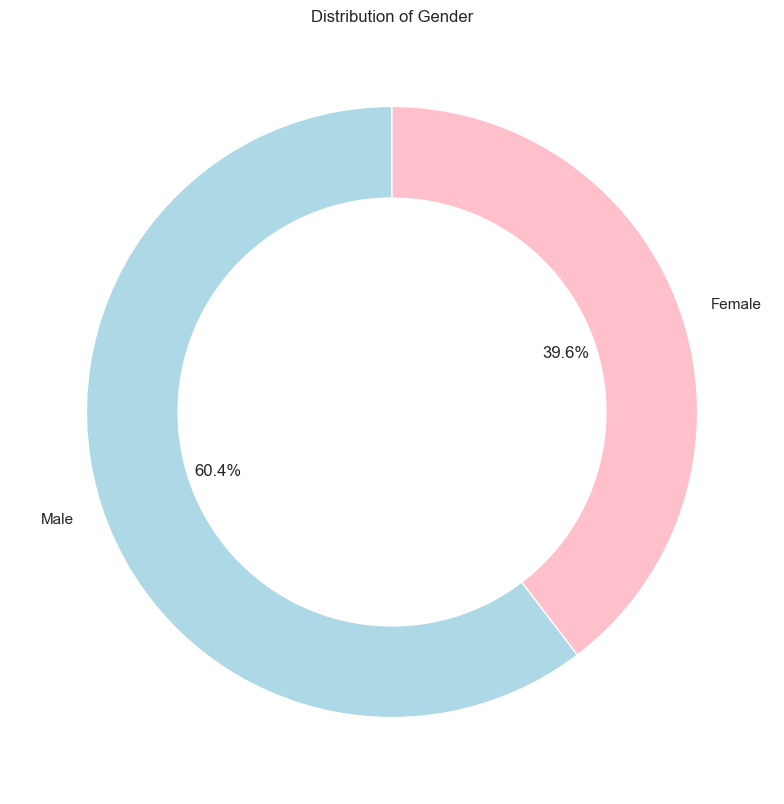

In [27]:
# SEX; Distribution of gender
# DONUT CHART

# counts of each gender
gender_counts = df['SEX'].value_counts() 

# plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])

# drawing a circle to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# ensuring that pie is drawn as a circle by applying equal aspect ratio
plt.tight_layout()
plt.title('Distribution of Gender')
plt.show()


In [ ]:
# EXPLORING EDUCATION

In [37]:
# Accessing the data in the EDUCATION column
education_data = df['EDUCATION']

# Displaying the data
print(education_data)


ID
1        2
2        2
3        2
4        2
5        2
        ..
29996    3
29997    3
29998    2
29999    3
30000    2
Name: EDUCATION, Length: 30000, dtype: int64


In [38]:
# values to consider
education_values = [1, 2, 3, 4, 5, 6]

# filtering the DataFrame(df) basing on the specified values
filtered_df = df[df['EDUCATION'].isin(education_values)]

# counting number of entries
total_entries = len(filtered_df)

# result
print("Total entries with specified education levels:", total_entries)


Total entries with specified education levels: 29986


In [39]:
# Number of entries for each education level
# KEY: EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

education_counts = df['EDUCATION'].value_counts()

print("Counts for each education level:")
print(education_counts)


Counts for each education level:
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


In [59]:
df.columns

Index(['EDUCATION', 'Default', 'EDUCATION_GROUP'], dtype='object')

In [62]:
df_copy = pd.read_csv("./UCI_Credit_Card.csv",index_col=0)
print(df_copy)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1        20000.0    2          2         1   24      2      2     -1     -1   
2       120000.0    2          2         2   26     -1      2      0      0   
3        90000.0    2          2         2   34      0      0      0      0   
4        50000.0    2          2         1   37      0      0      0      0   
5        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996   220000.0    1          3         1   39      0      0      0      0   
29997   150000.0    1          3         2   43     -1     -1     -1     -1   
29998    30000.0    1          2         2   37      4      3      2     -1   
29999    80000.0    1          3         1   41      1     -1      0      0   
30000    50000.0    1          2         1   46     

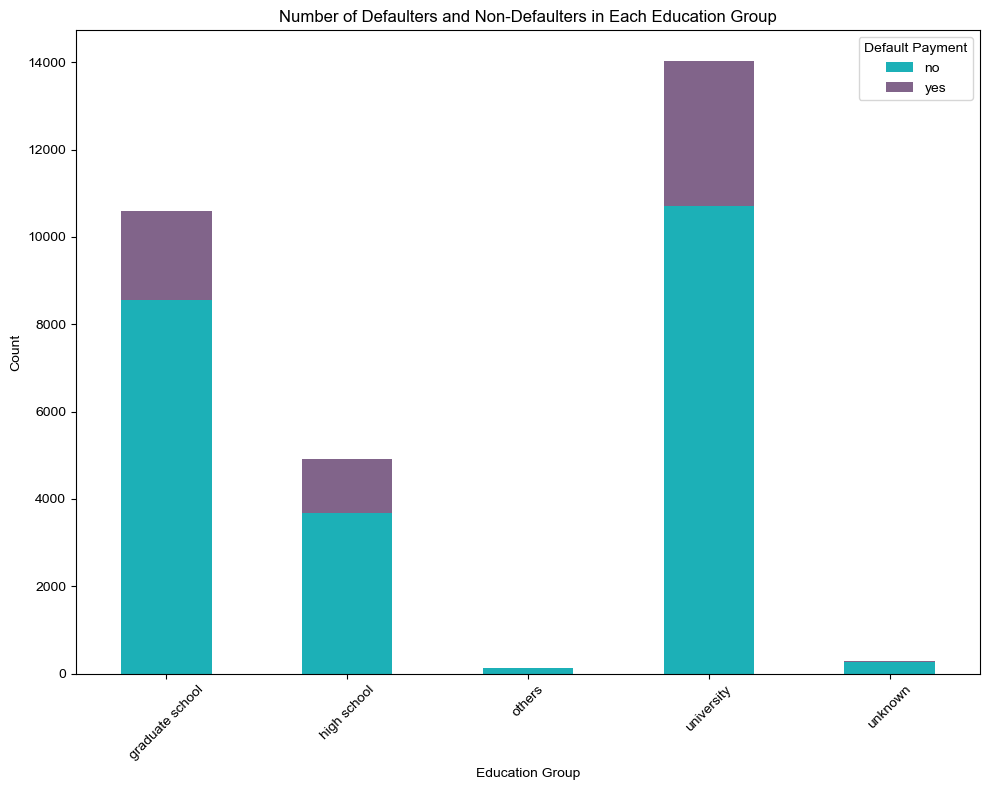

In [64]:
# Segments of defaulters and non-defaulters in each education level
# STACKED BAR CHART

# font setting
plt.rcParams['font.family'] = 'Arial'

# defining bins and labels for education groups
education_labels = ['graduate school', 'university', 'high school', 'others', 'unknown']

# creating new column for education groups 
df_copy['EDUCATION_GROUP'] = df_copy['EDUCATION'].map({1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others', 5: 'unknown'})
df_copy['default_payment'] = df_copy['default.payment.next.month'].map({1: 'yes', 0: 'no'})

# calculating the counts of default and non-default cases in each education group
education_group_counts = df_copy.groupby(['EDUCATION_GROUP', 'default_payment']).size().unstack(fill_value=0)

# colors
colors = ['#1cb0b7', '#81648a']

# plotting the counts
education_group_counts.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors)

# plot labels and title
plt.title('Number of Defaulters and Non-Defaulters in Each Education Group')
plt.xlabel('Education Group')
plt.ylabel('Count')

# legend
plt.legend(title='Default Payment')

# displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


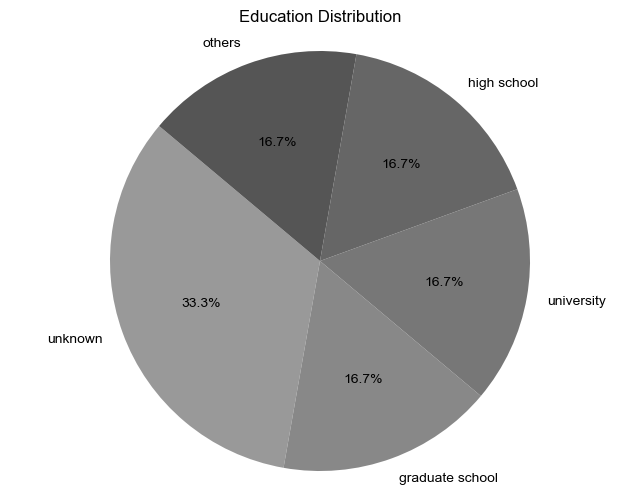

In [67]:
import matplotlib.pyplot as plt

data = {'EDUCATION': ['1=graduate school', '2=university', '3=high school', '4=others', '5=unknown', '6=unknown']}

# dataframe creation
df_education = pd.DataFrame(data)

# Counting the frequency of each unique value in the 'EDUCATION' column
education_counts = df_education['EDUCATION'].apply(lambda x: x.split('=')[1]).value_counts()

# colours in various shades of grey
shades_of_grey = ['#999999', '#888888', '#777777', '#666666', '#555555', '#444444']

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=shades_of_grey)
plt.title('Education Distribution')
plt.axis('equal')  # equal aspect ratio 

# displaying the chart
plt.show()


- What's the influence of Risk and Credit Amount in other features?

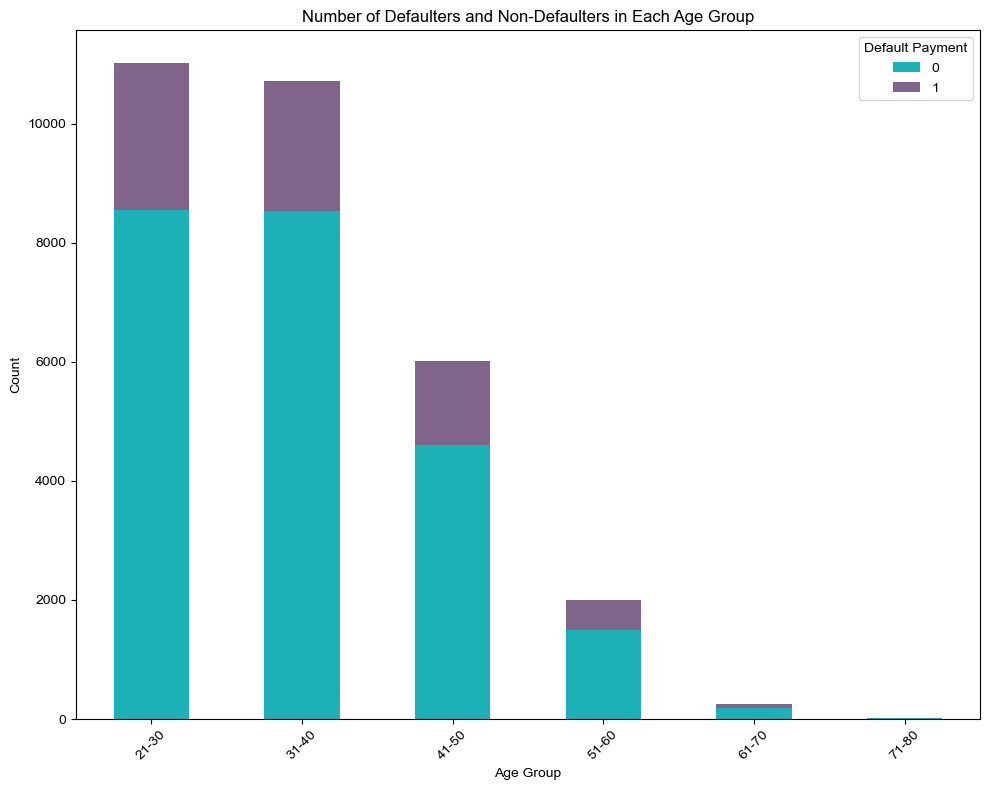

In [22]:

# Segments of defaulters and non-defaulters in each age group
# STACKED BAR CHART

# font setting
plt.rcParams['font.family'] = 'Arial'

# defining bins and labels for age groups
bins = [20, 30, 40, 50, 60, 70, 80]
names = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# creating new column for age groups
df['AGE_BIN'] = pd.cut(df['AGE'], bins=bins, labels=names, right=True)

# calculating the counts of default and non-default cases in each age group
age_group_counts = df.groupby(['AGE_BIN', 'default.payment.next.month']).size().unstack(fill_value=0)

# defining the colors
colors = ['#1cb0b7', '#81648a']

# plotting the counts
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors)

# plot labels and title
plt.title('Number of Defaulters and Non-Defaulters in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# legend
plt.legend(title='Default Payment')

# displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- How are the numerical attributes distributed?

C:\Users\Student\AppData\Local\Temp\ipykernel_12472\408607157.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), annot=True)


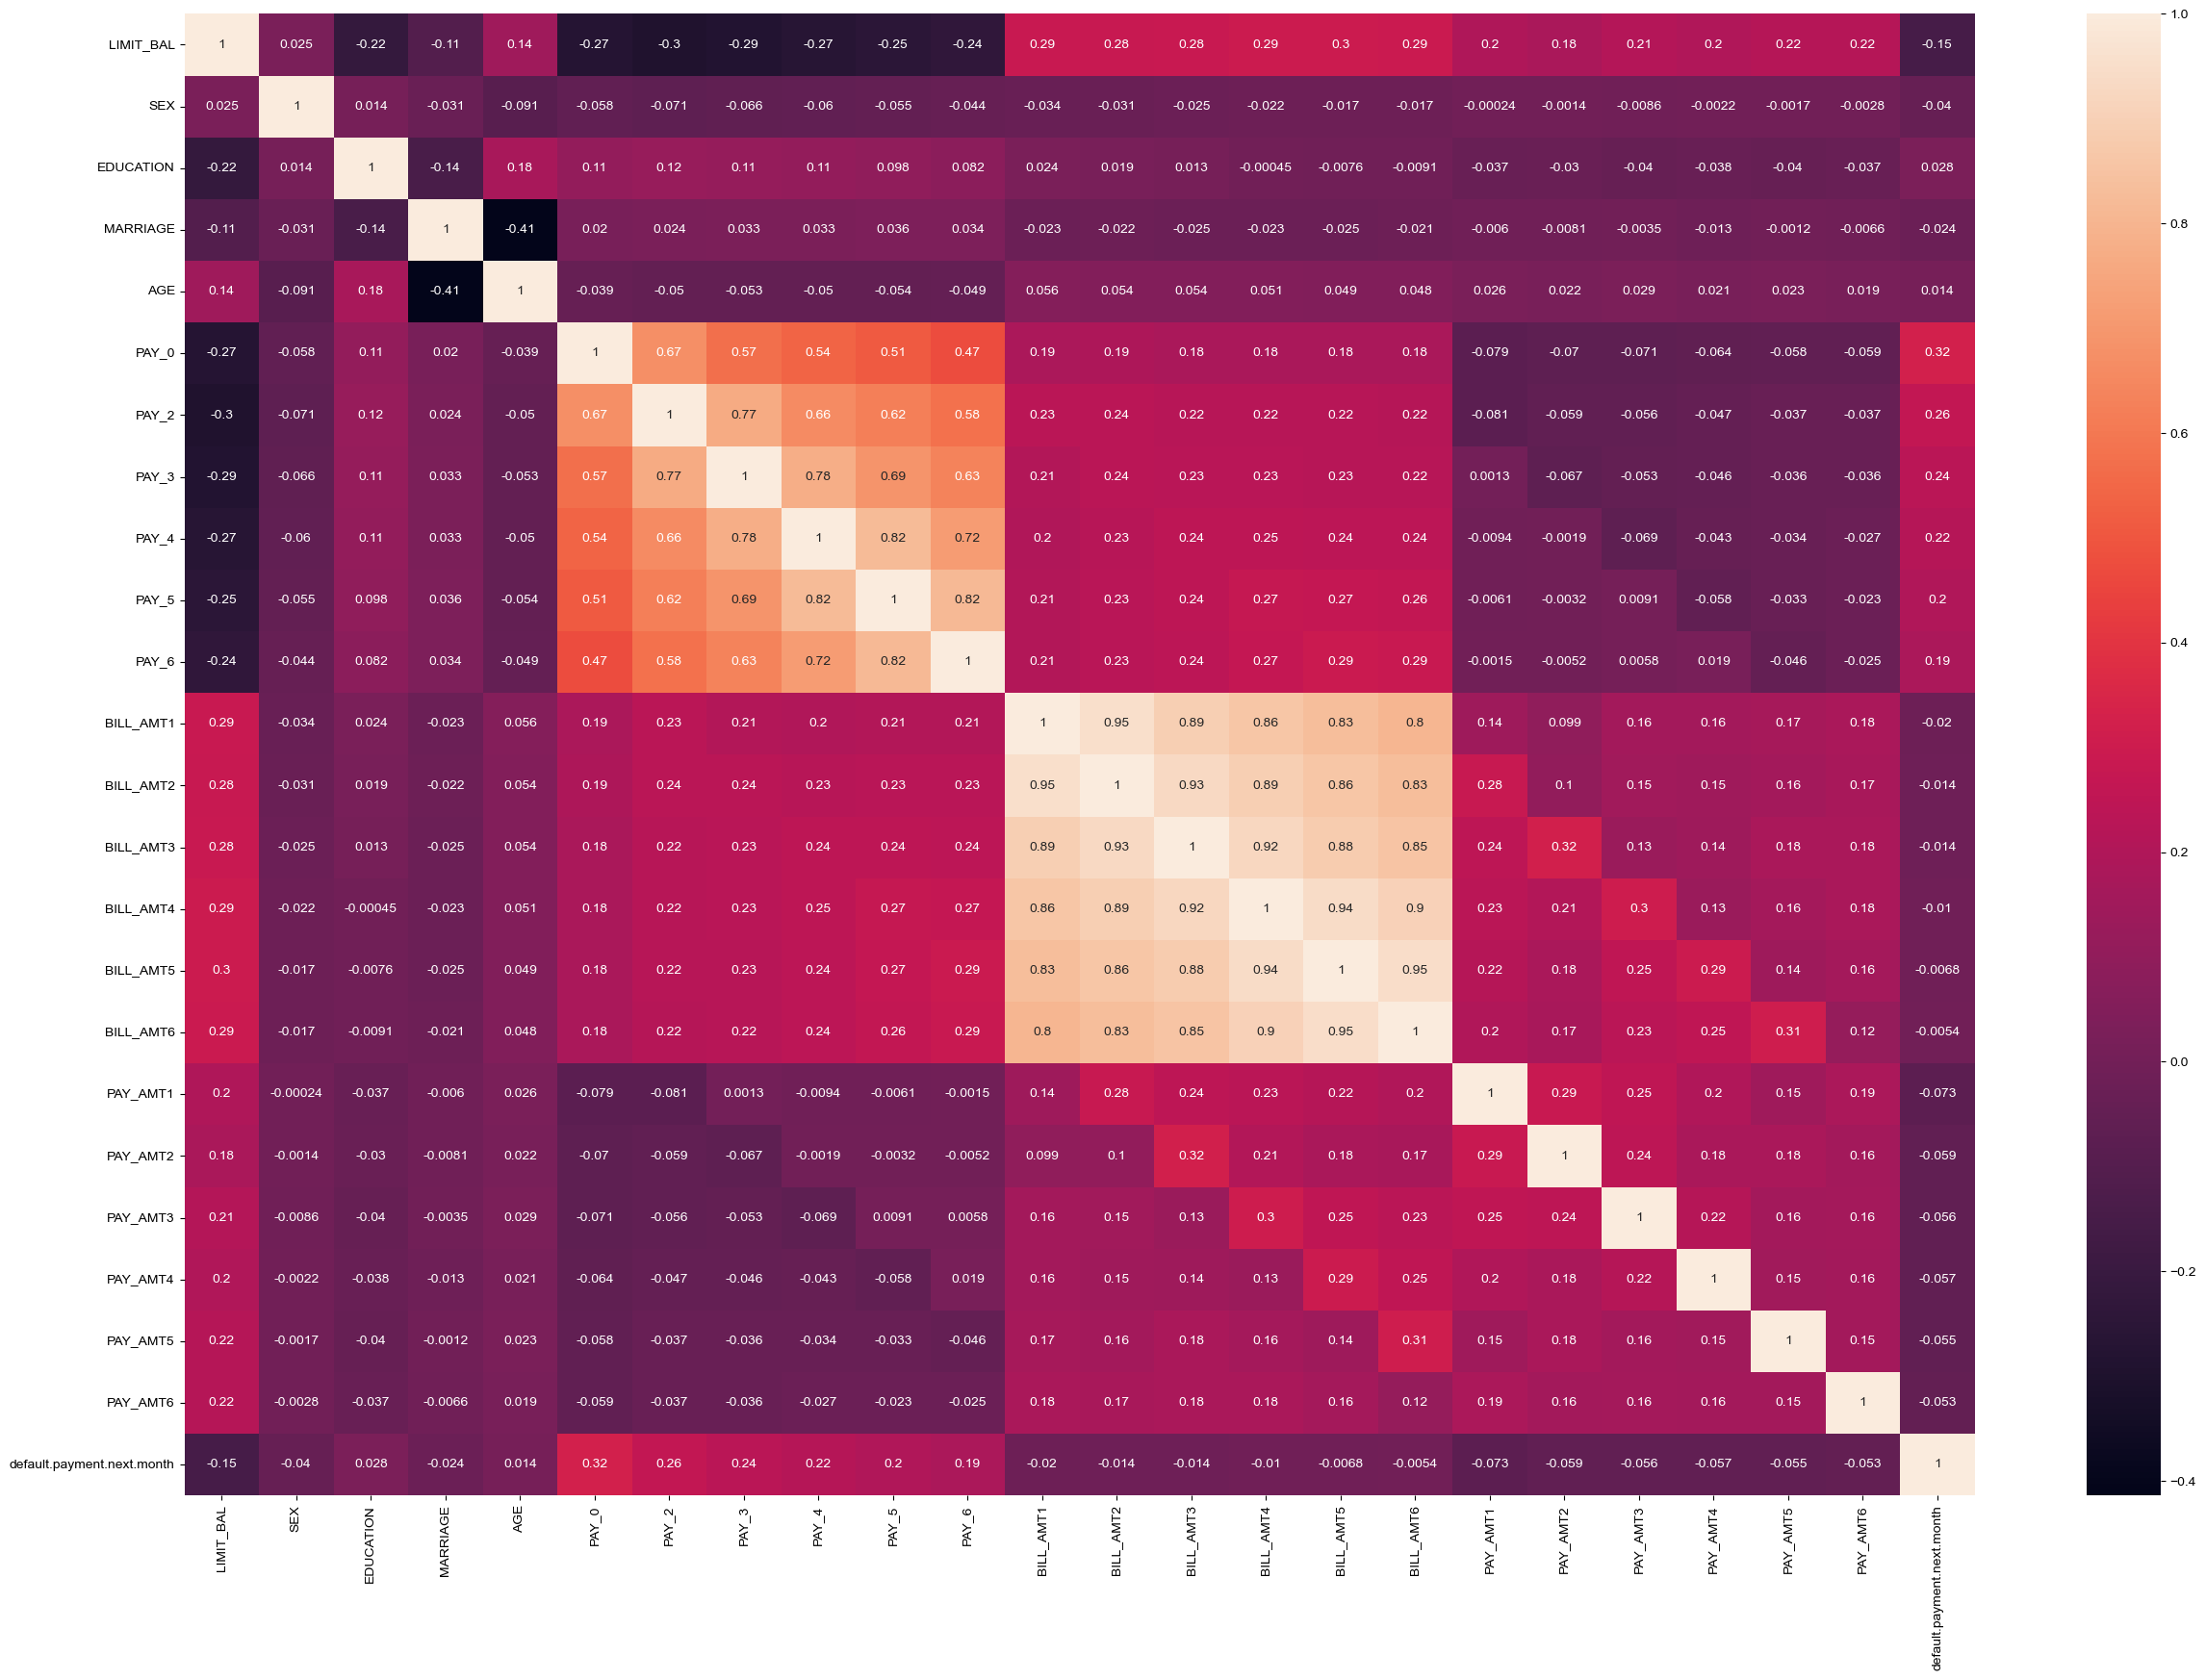

In [72]:
# Heatmap

plt.subplots(figsize=(30,20))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()